# Introduction

We aim to accomplist the following for this study:

1.Identify and visualize which factors contribute to customer churn:

2.Build a prediction model that will perform the following:

    * Classify if a customer is going to churn or not

In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# Read the data frame
Train_data = pd.read_excel('train_data.xlsx')
Test_data = pd.read_excel('test_data.xlsx')
#shape of the data
print(Train_data.shape)
print(Test_data.shape)

(7360, 21)
(1840, 20)


The Train_data has 7360 rows with 21 attributes. We review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

In [4]:
Train_data.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,0
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,0
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,0
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,1
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,0


In [5]:
Test_data.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70


In [6]:
# Count the column types
Train_data.dtypes.value_counts()

int64      11
object      8
float64     2
dtype: int64

In [7]:
# Check columns list and missing values
Train_data.isnull().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
dtype: int64

In [8]:
Test_data.isnull().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
dtype: int64

In [9]:
# Get unique count for each variable
Train_data.nunique()

CustomerID              7360
CustomerName            7360
yearofBirth               70
monthofBirth              12
dayofBirth                28
yearofEntry               11
monthofEntry              12
dayofEntry                28
Gender                     2
Location                   3
Education                  4
MaritalStatus              3
Occupation                 7
Ownhouse                   3
CreditScore              449
AccountBalance          4706
NumberOfProducts           4
IsCreditCardCustomer       2
ActiveMember               2
Salary                  7359
Churn                      2
dtype: int64

In [10]:
#datatypes of data
Train_data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                     int64
dtype: object

In [11]:
Train_data.columns

Index(['CustomerID', 'CustomerName', 'yearofBirth', 'monthofBirth',
       'dayofBirth', 'yearofEntry', 'monthofEntry', 'dayofEntry', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'CreditScore', 'AccountBalance', 'NumberOfProducts',
       'IsCreditCardCustomer', 'ActiveMember', 'Salary', 'Churn'],
      dtype='object')

In [12]:
for col in ('CustomerID', 'CustomerName', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'IsCreditCardCustomer', 'ActiveMember', 'Churn'):
    Train_data[col] = Train_data[col].astype('category')
    

In [13]:
for col in ('CustomerID', 'CustomerName', 'Gender',
       'Location', 'Education', 'MaritalStatus', 'Occupation', 'Ownhouse',
       'IsCreditCardCustomer', 'ActiveMember'):
    Test_data[col] = Test_data[col].astype('category')

In [14]:
#for checking datatypes of data
Train_data.dtypes

CustomerID              category
CustomerName            category
yearofBirth                int64
monthofBirth               int64
dayofBirth                 int64
yearofEntry                int64
monthofEntry               int64
dayofEntry                 int64
Gender                  category
Location                category
Education               category
MaritalStatus           category
Occupation              category
Ownhouse                category
CreditScore                int64
AccountBalance           float64
NumberOfProducts           int64
IsCreditCardCustomer    category
ActiveMember            category
Salary                   float64
Churn                   category
dtype: object

### Splitting data into categorical_Attributes and numerical_Attributes

In [15]:
categorical = list(Train_data.select_dtypes("category").columns)
numeric = list(Train_data.columns.difference(categorical_Attributes))

print(categorical)
print(numeric)

NameError: name 'categorical_Attributes' is not defined

# Exploratory Data Analysis

In [17]:
Train_data['Churn'].value_counts(normalize=True)

0    0.797283
1    0.202717
Name: Churn, dtype: float64

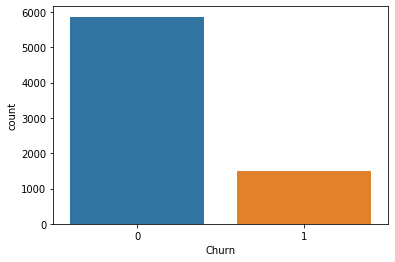

In [589]:
sns.countplot(x='Churn',data=Train_data)

plt.savefig("Churn1.png")

*From this chart, one can see that there are many records with the target label  0  and fewer records with the target label  1 . One can see that the data records with a  0  label are about  79.72% , whereas  20.27%  of the data records are labeled  1 .

In [590]:
pd.crosstab(Train_data["NumberOfProducts"],Train_data["Churn"])

Churn,0,1
NumberOfProducts,,
1,2725,1043
2,3110,253
3,33,156
4,0,40


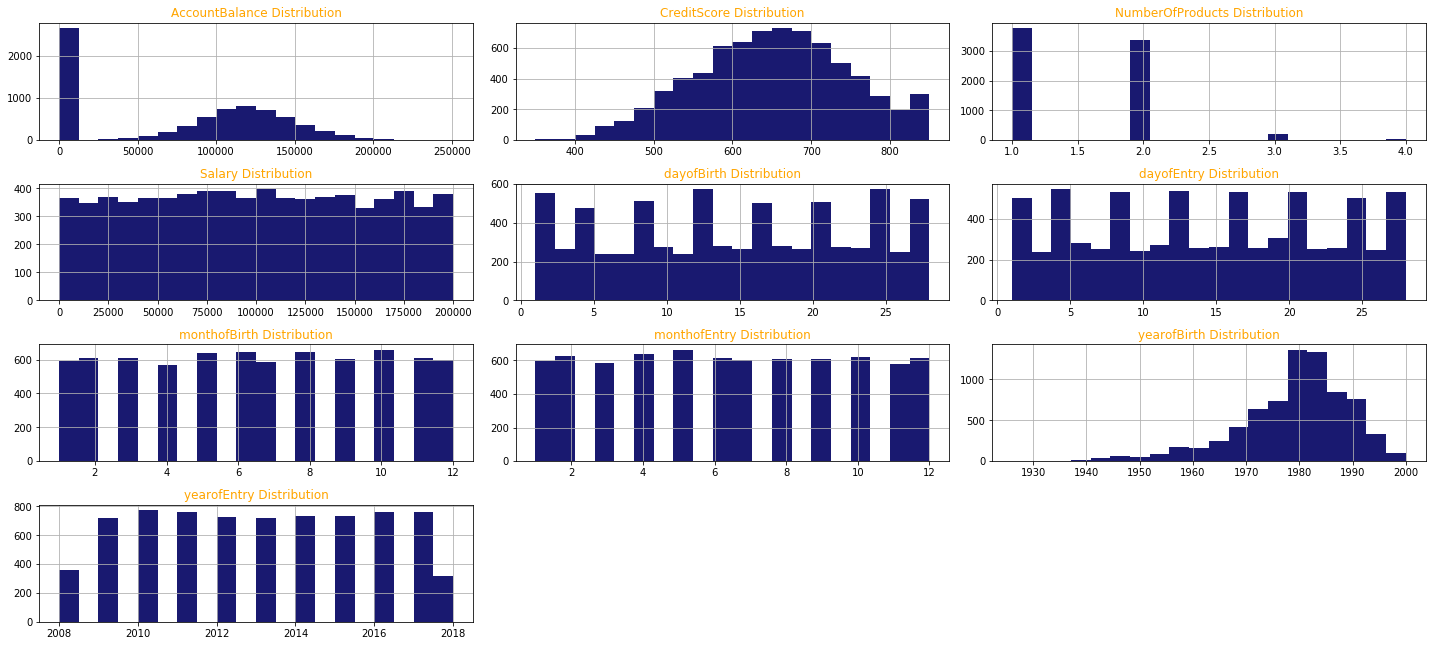

In [591]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='Orange')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(Train_data[numerical],Train_data[numerical].columns,9,3)

# Correlation Heatmap

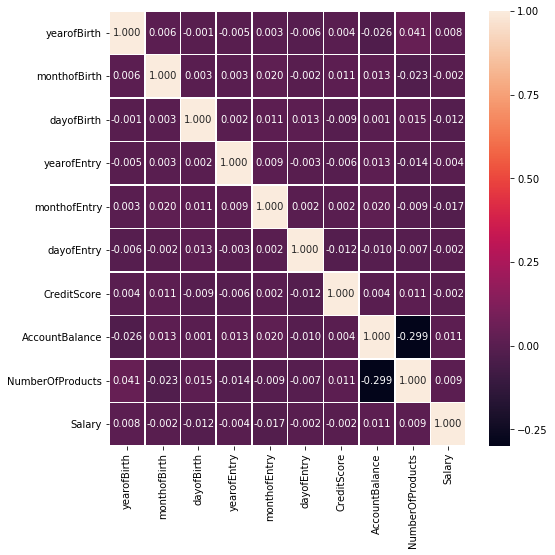

In [18]:
### Correlation Heatmap 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(Train_data.corr(), annot=True, linewidths=.5, fmt= '.3f',ax=ax)
plt.savefig("corr_heatmap.png")

In [593]:
### Dropping some irrelevant variables of the Train Data and Test data

colto_drop = ['CustomerID', 'CustomerName', 'dayofBirth', 'dayofEntry', 'monthofBirth', 'monthofEntry',
                   'Education']
for col in colto_drop:
    Train_data.drop([col],axis=1,inplace=True)



In [594]:
colto_drop = ['CustomerID', 'CustomerName', 'dayofBirth', 'dayofEntry', 'monthofBirth', 'monthofEntry',
                   'Education']
for col in colto_drop:
    Test_data.drop([col],axis=1,inplace=True)

In [595]:
print(Train_data.shape)
print(Test_data.shape)

(7360, 14)
(1840, 13)


In [596]:
x = Train_data.drop('Churn',1)

In [597]:
print(x.shape)
print(Test_data.shape)


(7360, 13)
(1840, 13)


In [598]:
y = Train_data['Churn']

In [599]:
### Dummification ###
x_dummies = pd.get_dummies(x)
x_dummies.head()

,yearofBirth,yearofEntry,CreditScore,AccountBalance,NumberOfProducts,Salary,Gender_Female,Gender_Male,Location_Location11,Location_Location12,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,1980,2014,716,0.00,2,189678.70,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
1,1986,2011,568,169399.60,1,61936.22,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,1999,2013,739,89750.21,1,193008.52,0,1,0,0,...,0,0,1,0,1,0,0,1,1,0
3,1969,2015,678,204510.94,1,738.88,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
4,1993,2012,670,0.00,2,78358.94,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1


In [600]:
x_dummies.shape

(7360, 28)

In [601]:
Test_data_dummies = pd.get_dummies(Test_data)
Test_data_dummies.head()

,yearofBirth,yearofEntry,CreditScore,AccountBalance,NumberOfProducts,Salary,Gender_Female,Gender_Male,Location_Location11,Location_Location12,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,1972,2015,624,0.00,2,62825.03,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1990,2016,777,134571.50,1,118313.38,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,1966,2011,707,0.00,1,109688.82,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1983,2016,746,172274.01,1,22374.97,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
4,1983,2009,762,0.00,2,43075.70,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


In [602]:
Test_data_dummies.head()

,yearofBirth,yearofEntry,CreditScore,AccountBalance,NumberOfProducts,Salary,Gender_Female,Gender_Male,Location_Location11,Location_Location12,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,1972,2015,624,0.00,2,62825.03,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1990,2016,777,134571.50,1,118313.38,1,0,1,0,...,0,0,0,0,0,1,1,0,0,1
2,1966,2011,707,0.00,1,109688.82,1,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1983,2016,746,172274.01,1,22374.97,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0
4,1983,2009,762,0.00,2,43075.70,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1


# Normalizing the Data

In [603]:
from sklearn_pandas import DataFrameMapper, cross_val_score

In [604]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(x_dummies)
scaled_features_df = pd.DataFrame(scaled_features, index=x_dummies.index, columns=x_dummies.columns)

In [605]:
scaled_features_df.head()

,yearofBirth,yearofEntry,CreditScore,AccountBalance,NumberOfProducts,Salary,Gender_Female,Gender_Male,Location_Location11,Location_Location12,...,Occupation_services,Occupation_technician,Occupation_unknown,Ownhouse_no,Ownhouse_unknown,Ownhouse_yes,IsCreditCardCustomer_0,IsCreditCardCustomer_1,ActiveMember_0,ActiveMember_1
0,0.089944,0.350294,0.675376,-1.226835,0.823394,1.564583,-0.918022,0.918022,0.996474,-0.576095,...,-0.339838,-0.341824,-0.344545,0.998914,-0.163225,-0.948343,-0.648095,0.648095,1.021147,-1.021147
1,0.663340,-0.684836,-0.854139,1.486252,-0.908581,-0.663283,1.089299,-1.089299,-1.003539,-0.576095,...,-0.339838,-0.341824,-0.344545,0.998914,-0.163225,-0.948343,-0.648095,0.648095,1.021147,-1.021147
2,1.905700,0.005251,0.913071,0.210595,-0.908581,1.622656,-0.918022,0.918022,-1.003539,-0.576095,...,-0.339838,-0.341824,2.902381,-1.001088,6.126502,-0.948343,-0.648095,0.648095,1.021147,-1.021147
3,-0.961283,0.695337,0.282663,2.048591,-0.908581,-1.730583,1.089299,-1.089299,0.996474,-0.576095,...,-0.339838,-0.341824,-0.344545,-1.001088,-0.163225,1.054471,1.542984,-1.542984,-0.979290,0.979290
4,1.332303,-0.339792,0.199986,-1.226835,0.823394,-0.376866,-0.918022,0.918022,-1.003539,-0.576095,...,-0.339838,-0.341824,-0.344545,0.998914,-0.163225,-0.948343,-0.648095,0.648095,-0.979290,0.979290


In [606]:
from sklearn.preprocessing import MinMaxScaler
Normal = MinMaxScaler()
train_scaler = Normal.fit_transform(x_dummies)
test_scaler = Normal.transform(Test_data_dummies)

In [607]:
train_scaler.shape

(7360, 28)

In [608]:
test_scaler.shape

(1840, 28)

# Train_test_split

In [609]:
# Import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score
# Split the 'features' and 'Target' data into training and validation sets
seed = 1234
X_train, X_val, y_train, y_val = train_test_split(train_scaler, y, test_size = 0.3, random_state = seed)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(X_val.shape))

Training set has (5152, 28) samples.
Testing set has (2208, 28) samples.


# Model Building 

# Logistic Reggression 

In [610]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [611]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [612]:
pred  = model.predict(X_train)

In [613]:
### Predicting the Train Accuracy and classification Report
accuracy_score(y_train,pred)

0.8260869565217391

In [614]:
from sklearn.metrics import classification_report
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4111
           1       0.70      0.25      0.36      1041

    accuracy                           0.83      5152
   macro avg       0.77      0.61      0.63      5152
weighted avg       0.81      0.83      0.79      5152



In [615]:
### Predicting the Validation Accuracy and classification Report
accuracy_score(y_val,model.predict(X_val))


0.8192934782608695

In [616]:
print(classification_report(y_val,model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1757
           1       0.68      0.22      0.33       451

    accuracy                           0.82      2208
   macro avg       0.75      0.60      0.61      2208
weighted avg       0.80      0.82      0.78      2208



In [617]:
### Predicting the Test Data
pred_test = model.predict(test_scaler)

In [618]:
submission = pd.read_csv('submission.csv')
submission['Churn']=pred_test
submission.head()

,CustomerID,Churn
0,C5993228,0
1,C6546925,0
2,C7491750,0
3,C8462011,0
4,C3187447,0


In [619]:
submission_logRegression = submission.to_csv("submission_logRegression.csv",index = False)

# Support Vector Classifier


In [620]:
from sklearn.svm import SVC
supportvector = SVC(kernel='rbf',random_state=1234)


In [621]:
supportvector.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [622]:
### Predicting the Train Accuracy and classification Report
print(accuracy_score(y_train,supportvector.predict(X_train)))
print(classification_report(y_train,supportvector.predict(X_train)))

0.8107531055900621
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      4111
           1       0.89      0.07      0.13      1041

    accuracy                           0.81      5152
   macro avg       0.85      0.53      0.51      5152
weighted avg       0.83      0.81      0.74      5152



In [623]:
### Predicting the Validation Accuracy and classification Report
print(accuracy_score(y_val,supportvector.predict(X_val)))
print(classification_report(y_val,supportvector.predict(X_val)))

0.8016304347826086
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1757
           1       0.72      0.05      0.09       451

    accuracy                           0.80      2208
   macro avg       0.76      0.52      0.49      2208
weighted avg       0.79      0.80      0.73      2208



In [624]:
### Predicting the Test Data
pred_svc = supportvector.predict(test_scaler)

In [625]:
### Writing the Predicted values into CSV 
sub1 = pd.read_csv('submission.csv')
sub1['Churn']=pred_svc
sub1.head()


,CustomerID,Churn
0,C5993228,0
1,C6546925,0
2,C7491750,0
3,C8462011,0
4,C3187447,0


In [626]:
submission_svc = submission.to_csv("submission_svc.csv",index = False)

# KNN Classifier

In [627]:

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [628]:

### ### Predicting the Train Accuracy and classification Report
print(accuracy_score(y_train,KNN.predict(X_train)))
print(classification_report(y_train,KNN.predict(X_train)))

0.8385093167701864
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      4111
           1       0.72      0.32      0.45      1041

    accuracy                           0.84      5152
   macro avg       0.79      0.65      0.68      5152
weighted avg       0.82      0.84      0.81      5152



In [629]:

### Predicting the Validation Accuracy and classification Report
print(accuracy_score(y_val,KNN.predict(X_val)))
print(classification_report(y_val,KNN.predict(X_val)))

0.779891304347826
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1757
           1       0.39      0.14      0.20       451

    accuracy                           0.78      2208
   macro avg       0.60      0.54      0.54      2208
weighted avg       0.72      0.78      0.74      2208



In [630]:

### Predicting the Test Data
pred_KNN = KNN.predict(test_scaler)

In [631]:
### Writing the Predicted values into CSV 
sub1 = pd.read_csv('submission.csv')
sub1['Churn']=pred_KNN
sub1.head()

,CustomerID,Churn
0,C5993228,0
1,C6546925,0
2,C7491750,0
3,C8462011,0
4,C3187447,0


In [632]:
submission_KNN = submission.to_csv("submission_KNN.csv",index = False)